####  Data loading, manipulation, and visualization using Python libraries with Vehicle Datasets

This dataset contains information about used cars and is sourced from Kaggle. It includes various attributes of vehicles such as their make, year of manufacture, selling price, distance driven (in kilometers), fuel type, seller type, transmission type, and the number of previous owners. The dataset is well-suited for price prediction, market analysis, and understanding trends in the used car industry.

The dataset meets the criteria for this assignment, with over 1000 rows and at least 4 numerical features, making it ideal for data manipulation, visualization, and machine learning tasks.

Key attributes include:

Year: The year the car was first purchased.

Selling Price: The price at which the car is being resold.

Km Driven: The total distance the car has been driven.

Fuel Type: Type of fuel used (e.g., Petrol, Diesel, CNG).

Seller Type: Indicates whether the seller is an individual or a dealer.

Transmission: Specifies if the car has a manual or automatic transmission.

Owner: Number of previous owners (e.g., First Owner, Second Owner).

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew  # Import skew function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix

In [108]:
# Load the dataset
data = pd.read_csv(r"C:\Users\DSIHUB\Downloads\car_details.csv")

In [109]:
# Display dataset details
data

,make,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [110]:
# Display basic statistics along with the median
stats = data.describe()
stats.loc["median"] = data.median(numeric_only=True)  # Add median row

display(stats.head())

,year,selling_price,km_driven
count,4340.000000,4340.000000,4340.000000
mean,2013.090783,504127.311751,66215.777419
std,4.215344,578548.736139,46644.102194
min,1992.000000,20000.000000,1.000000
25%,2011.000000,208749.750000,35000.000000


In [111]:
# To include the 4th feature
# Convert "Owner" column into numerical features
data["First_Owner"] = (data["owner"] == "First Owner").astype(int)
data["Second_Owner"] = (data["owner"] == "Second Owner").astype(int)

# Display basic statistics along with the median
stats = data.describe()
stats.loc["median"] = data.median(numeric_only=True)  # Add median row

display(stats.head())

,year,selling_price,km_driven,First_Owner,Second_Owner
count,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,2013.090783,504127.311751,66215.777419,0.652535,0.254839
std,4.215344,578548.736139,46644.102194,0.476220,0.435821
min,1992.000000,20000.000000,1.000000,0.000000,0.000000
25%,2011.000000,208749.750000,35000.000000,0.000000,0.000000


In [112]:
# Select four numerical features
features = ["year", "selling_price","km_driven", "First_Owner"]

In [113]:
# Calculate skewness for each selected feature
skewness_values = data[features].apply(skew, nan_policy='omit')

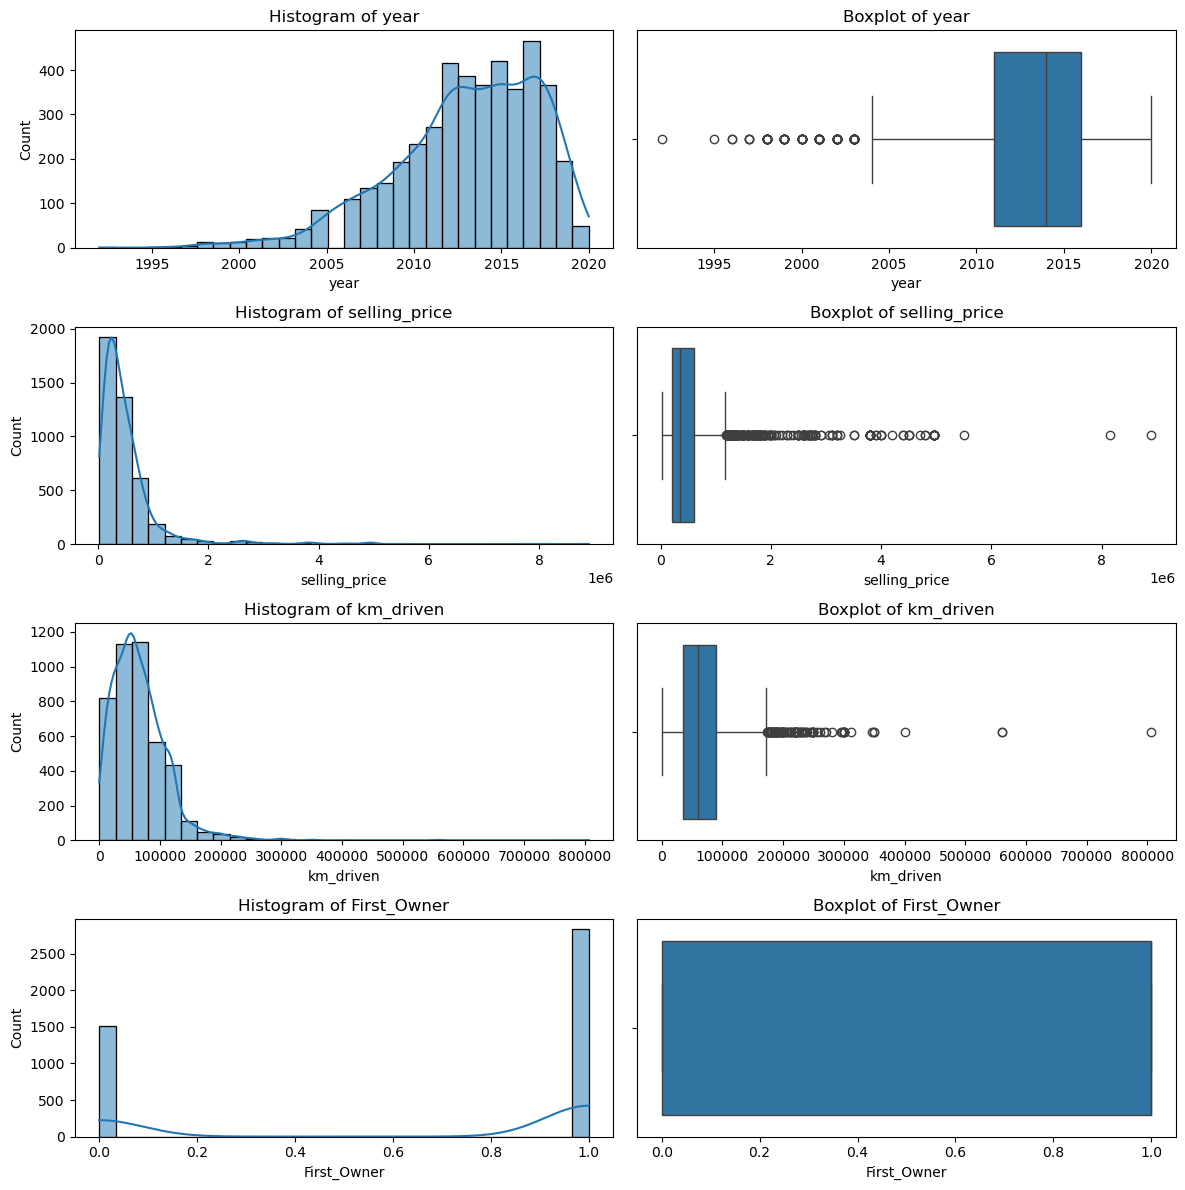

Skewness of selected numerical features:
year            -0.832952
selling_price    4.890331
km_driven        2.668134
First_Owner     -0.640679
dtype: float64


In [114]:
# Plot histograms and boxplots for each feature
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f"Histogram of {feature}")

    sns.boxplot(x=data[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

# Display skewness values
print("Skewness of selected numerical features:")
print(skewness_values)


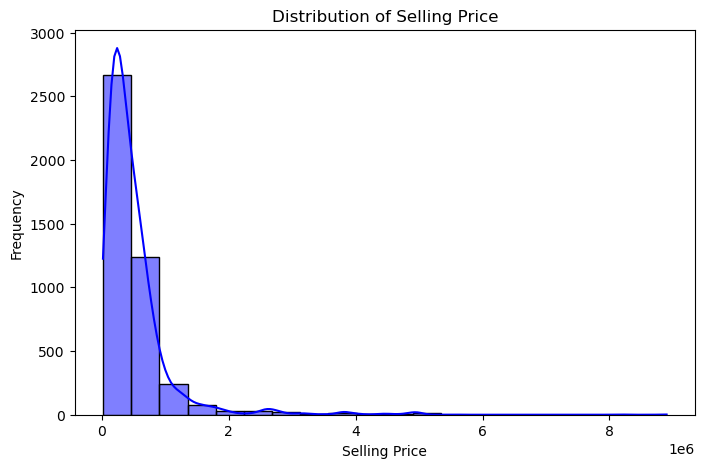

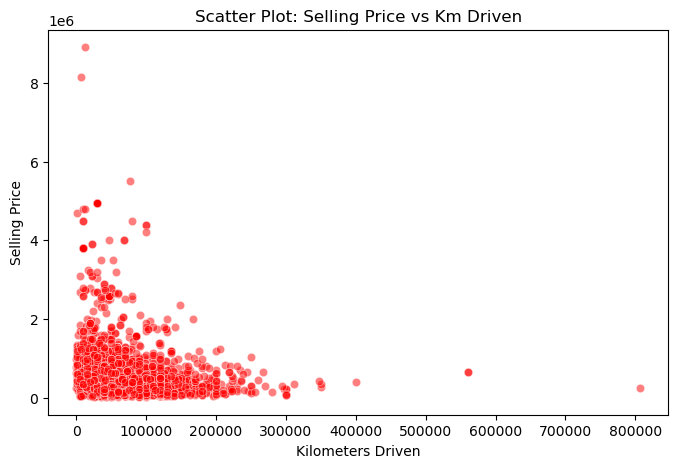

In [115]:
## Data Visualization = (a) HISTOGRAM - Create a histogram to visualize the distribution of Selling Price
plt.figure(figsize=(8, 5)) # Set figure size
# Histogram with KDE
sns.histplot(data["selling_price"], bins=20, kde=True, color="blue")
# Set title
plt.title("Distribution of Selling Price")
# Label x-axis and y-axis
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

## (b) SCATTER PLOT - Create a scatter plot to visualize the relationship between Selling Price and Km Driven
# Set figure size
plt.figure(figsize=(8, 5))
# Scatter plot with transparency (alpha) for better visualization
sns.scatterplot(x=data["km_driven"], y=data["selling_price"], alpha=0.5, color="red")
# Set title
plt.title("Scatter Plot: Selling Price vs Km Driven")
# Label x-axis and y-axis
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.show()

In [116]:
# (a) SELECT A SUBSET BASED ON A SPECIFIC CONDITION #
# Select cars that are first owner and selling price is greater than 500,000
subset_data = data[(data["owner"] == "First Owner") & (data["selling_price"] > 500000)]

# Display the first few rows of the subset
print("Subset of cars with first ownership and Selling Price > 500,000:")

#to print in a well formatted table
from IPython.display import display

# Display subset data in a table format
display(subset_data.head())




Subset of cars with first ownership and Selling Price > 500,000:


,make,year,selling_price,km_driven,fuel,seller_type,transmission,owner,First_Owner,Second_Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1,0
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner,1,0
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner,1,0
12,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner,1,0
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1,0


In [117]:
# (b) GROUP DATA BASED ON A CATEGORICAL FEATURE #
# Group data by 'Fuel' type and calculate summary statistics
grouped_data = data.groupby("fuel")["selling_price"].agg(["mean", "median", "max", "min", "count"])

# Display grouped statistics
print("\nSummary statistics of Selling Price based on Fuel Type:")
display(grouped_data.head())


Summary statistics of Selling Price based on Fuel Type:


,mean,median,max,min,count
fuel,,,,,
CNG,277174.925000,247500.0,595000,45000,40
Diesel,669094.252206,500000.0,8150000,45000,2153
Electric,310000.000000,310000.0,310000,310000,1
LPG,167826.043478,180000.0,290000,50000,23
Petrol,344840.137541,269000.0,8900000,20000,2123


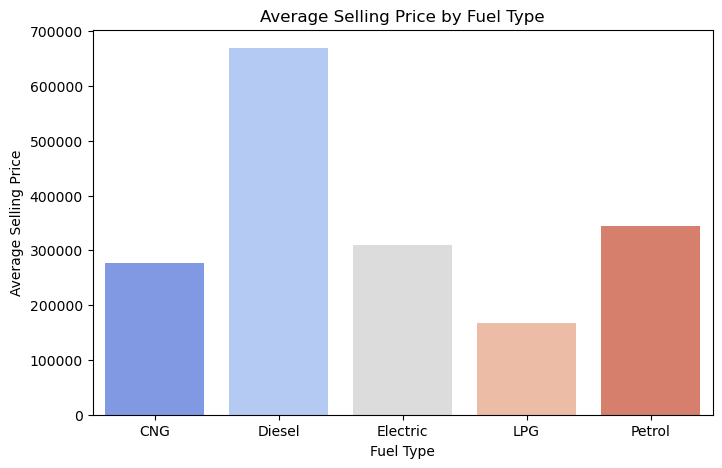

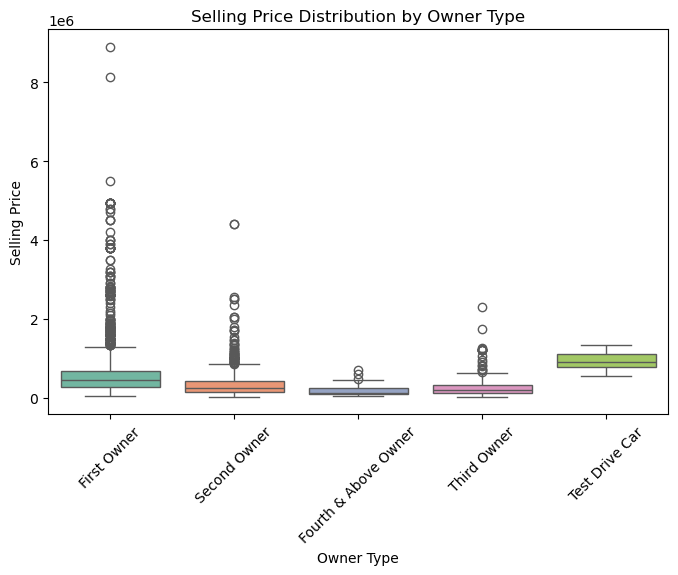

In [118]:
# (c) VISUALIZATIONS #

# BAR CHART: Average Selling Price by Fuel Type
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped_data.index, y=grouped_data["mean"], hue=grouped_data.index, palette="coolwarm", legend=False)
plt.title("Average Selling Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Selling Price")
plt.show()

# BOX PLOT: Distribution of Selling Price by Owner Type
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["owner"], y=data["selling_price"], hue=data["owner"], palette="Set2", legend=False)
plt.title("Selling Price Distribution by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

####  Machine Learning Models

###### Linear Regression: Predicting selling_price (Regression)

###### Random Forest Classifier: Predicting owner category (Classification)

In [119]:
# Drop irrelevant columns (modify as needed)
data.drop(["make"], axis=1, inplace=True)  # Assuming 'make' is not useful for prediction

# Convert categorical variables into numerical values
categorical_columns = ["fuel", "seller_type", "transmission", "owner"]
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])
                                             
# Define features and target for regression (Predicting selling_price)
X_reg = data.drop(["selling_price"], axis=1)
y_reg = data["selling_price"]


In [120]:
# Train-Test Split for Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

# Train Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)


# Predictions & Evaluation
y_pred_reg = reg_model.predict(X_test_reg)
print("Regression Model Performance")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_reg, y_pred_reg):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_reg, y_pred_reg):.2f}")


Regression Model Performance
Mean Absolute Error (MAE): 222533.78
Mean Squared Error (MSE): 184837653430.54


In [121]:
# CLASSIFICATION TASK 
# Define features and target for classification (Predicting owner type)
X_cls = data.drop(["owner"], axis=1)
y_cls = data["owner"]

# Train-Test Split for Classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)

# Predictions & Evaluation
y_pred_cls = clf.predict(X_test_cls)
print("\nClassification Model Performance")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_cls) * 100:.2f}%")


Classification Model Performance
Accuracy: 98.96%


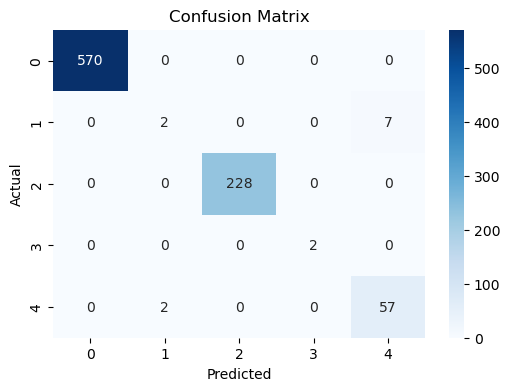

In [122]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(data["owner"]), yticklabels=np.unique(data["owner"]))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Conclusion

In this analysis, I explored a used car dataset by performing data exploration, visualization, and machine learning modeling. I calculated key statistics, identified data distributions, and observed that selling_price and km_driven were right-skewed, indicating the presence of high-value cars with extreme mileage. Visualizations such as histograms, scatter plots, and box plots provided deeper insights into pricing trends across different fuel types and ownership categories. I also manipulated the dataset by filtering high-value cars and grouping data to analyze pricing variations.

For predictive modeling, I implemented Linear Regression for price prediction and Random Forest Classification to predict ownership type, achieving valuable insights into the factors affecting resale value. While the classification model performed well, the regression model could be improved with advanced techniques like feature engineering and outlier removal. Future steps include exploring more robust machine learning models such as Random Forest Regressor or XGBoost and experimenting with deep learning for price prediction.